# Chapter 7 Unsupervised Learning
### Imported libraries

In [41]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import prince
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

### Principal Components Analysis

In [3]:
sp500_px = pd.read_csv('sp500_data.csv', index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]

In [4]:
pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
loadings

,XOM,CVX
0,-0.664711,-0.747101
1,0.747101,-0.664711


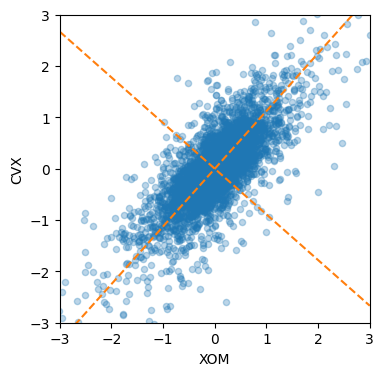

In [5]:
def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4,4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax),
        '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax),
        '--', color='C1')

### Interpreting Principal Components

Text(0.5, 0, 'Component')

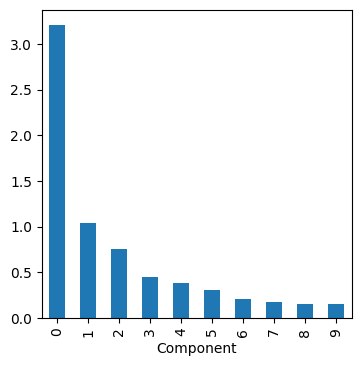

In [7]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4,4))
ax.set_xlabel('Component')

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


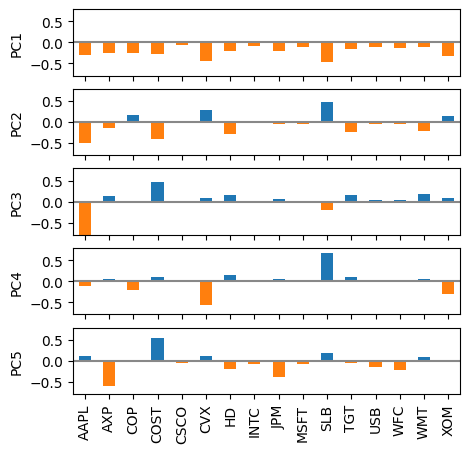

In [8]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5,1, figsize=(5,5), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

### Correspondence Analysis

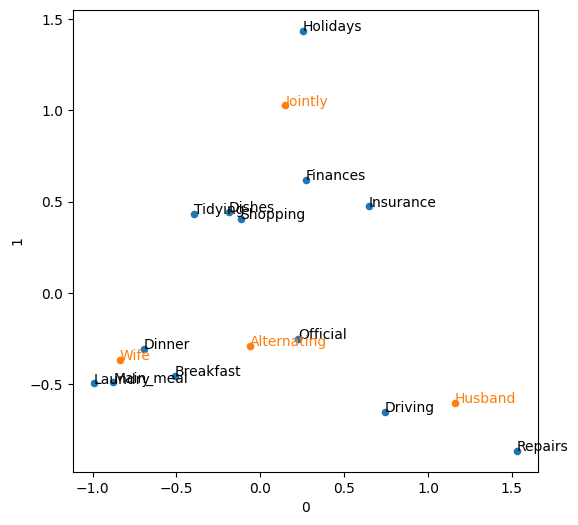

In [14]:
housetasks = pd.read_csv('housetasks.csv', index_col=0)

ca = prince.CA(n_components=2)
ca = ca.fit(housetasks)

ax = ca.row_coordinates(housetasks).plot.scatter(x=0, y=1, figsize=(6,6))
ca.column_coordinates(housetasks).plot.scatter(x=0, y=1, ax=ax, c='C1')
texts = []
for idx, row in ca.row_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx))
for idx, row in ca.column_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx, color='C1'))
plt.show()

### K-Means Clustering

In [16]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters=4).fit(df)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
df['cluster'] = kmeans.labels_
df.head()

,XOM,CVX,cluster
2011-01-03,0.736805,0.240681,2
2011-01-04,0.168668,-0.584516,1
2011-01-05,0.026631,0.446985,2
2011-01-06,0.248558,-0.919751,1
2011-01-07,0.337329,0.180511,2


In [19]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
centers

,XOM,CVX
0,0.960948,1.376572
1,-0.328125,-0.564848
2,0.242519,0.336479
3,-1.137958,-1.746642


<AxesSubplot: xlabel='XOM', ylabel='CVX'>

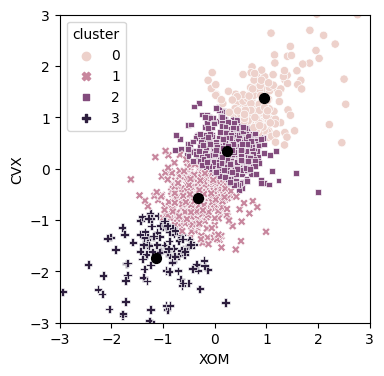

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='cluster', style='cluster', ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

### K-Means Algorithm

In [22]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters=5).fit(top_sp)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Interpreting the Clusters

In [23]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 291, 0: 252, 3: 297, 2: 187, 4: 104})

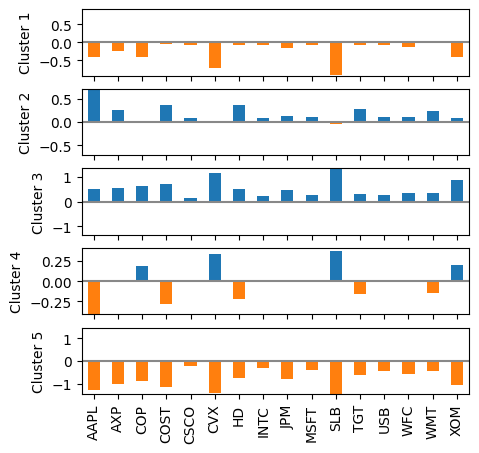

In [24]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=syms)

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i + 1}')
    ax.set_ylim(-maxPC, maxPC)

### Selecting the Number of Clusters

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

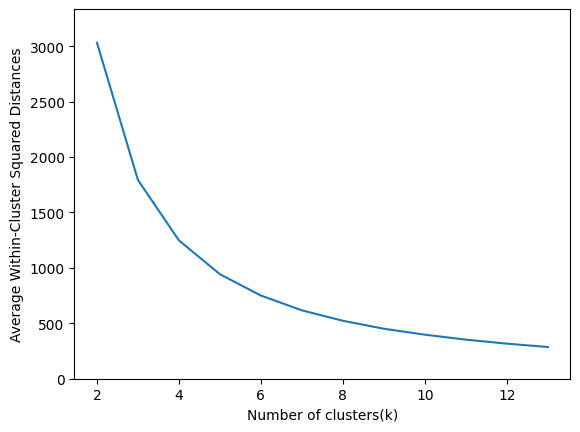

In [25]:
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(top_sp)
    inertia.append(kmeans.inertia_ / n_clusters)
    
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

### Hierarchical Clustering

In [27]:
syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD',
'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()
Z = linkage(df, method='complete')

### The Dendrogram

Text(0, 0.5, 'distance')

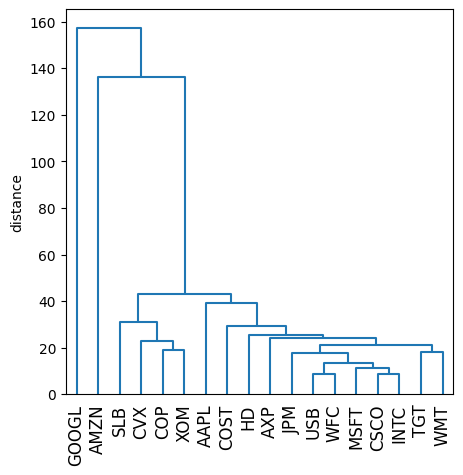

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=df.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [32]:
memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
    print(f"{key} : {', '.join(item.index)}")

1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


### Mixtures of Normals

In [34]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
mclust = GaussianMixture(n_components=2).fit(df)
mclust.bic(df)

4589.320317053261

(-3.0, 3.0)

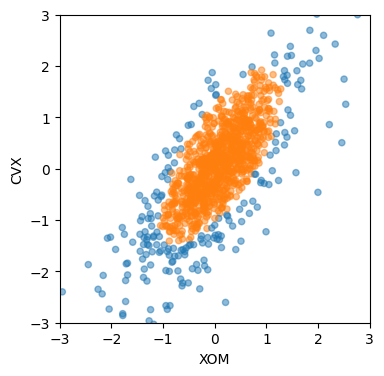

In [35]:
fig, ax = plt.subplots(figsize=(4, 4))
colors = [f'C{c}' for c in mclust.predict(df)]
df.plot.scatter(x='XOM', y='CVX', c=colors, alpha=0.5, ax=ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

In [36]:
print('Mean')
print(mclust.means_)
print('Covariances')
print(mclust.covariances_)

Mean
[[-0.05074943 -0.21539465]
 [ 0.0709161   0.10228006]]
Covariances
[[[0.98668327 0.99350046]
  [0.99350046 1.69695919]]

 [[0.27074158 0.27800893]
  [0.27800893 0.5212865 ]]]


### Selecting the Number of Clusters

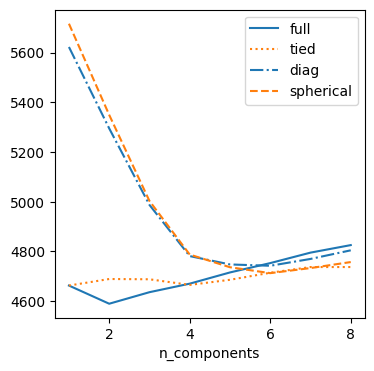

In [37]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components=n_components, warm_start=True,
                                 covariance_type=covariance_type)
        mclust.fit(df)
        results.append({
            'bic': mclust.bic(df),
            'n_components': n_components,
            'covariance_type': covariance_type,
})
results = pd.DataFrame(results)

colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-','C1:','C0-.', 'C1--']

fig, ax = plt.subplots(figsize=(4, 4))
for i, covariance_type in enumerate(covariance_types):
    subset = results.loc[results.covariance_type == covariance_type, :]
    subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type,
                kind='line', style=styles[i])

### Scaling the Variables

In [39]:
loan_data = pd.read_csv('loan_data.csv')

In [40]:
defaults = loan_data.loc[loan_data['outcome'] == 'default',]
columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc',
           'dti', 'revol_util']

df = defaults[columns]
kmeans = KMeans(n_clusters=4, random_state=1).fit(df)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers['size'] = [counts[i] for i in range(4)]
centers

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,size
0,18275.132345,83354.634595,19635.189254,11.664373,16.774586,62.258588,7543
1,21852.701005,165407.730318,38907.295645,12.597152,13.466876,63.634900,1194
2,10591.893792,42453.058692,10268.048598,9.583820,17.713563,58.111226,13882
3,22570.192308,489783.403846,85161.346154,13.326923,6.907500,59.651923,52


In [42]:
scaler = StandardScaler()
df0 = scaler.fit_transform(df * 1.0)

kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                        columns=columns)
centers['size'] = [counts[i] for i in range(4)]
centers

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,size
0,10499.824632,51070.958451,11629.172535,7.511129,15.965747,77.806693,7405
1,10315.255666,53468.181307,6032.616033,8.637385,11.255855,31.000342,5339
2,25920.260952,116308.326663,32827.641428,12.389941,16.204021,66.172004,3701
3,13420.700048,55844.852918,16370.832021,14.334512,24.189881,59.227862,6226


### Dominant Variables

Text(0.5, 0, 'Component')

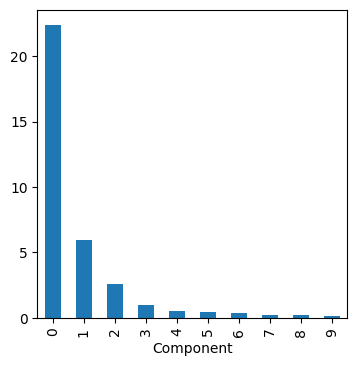

In [43]:
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM',
        'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]

sp_pca1 = PCA()
sp_pca1.fit(top_sp1)

explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

In [44]:
loadings = pd.DataFrame(sp_pca1.components_[0:2, :], columns=top_sp1.columns)
loadings.transpose()

,0,1
GOOGL,-0.857310,0.477873
AMZN,-0.444728,-0.874149
AAPL,-0.071627,-0.020802
MSFT,-0.036002,-0.006204
CSCO,-0.029205,-0.003045
INTC,-0.026666,-0.006069
CVX,-0.089548,-0.037420
XOM,-0.080336,-0.020511
SLB,-0.110218,-0.030356
COP,-0.057739,-0.024117


### Problems with Clustering Mixed Data

In [45]:
columns = ['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']
df = pd.get_dummies(defaults[columns])

scaler = StandardScaler()
df0 = scaler.fit_transform(df * 1.0)
kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                        columns=df.columns)
centers

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,dti,payment_inc_ratio,pub_rec_zero,home__MORTGAGE,home__OWN,home__RENT
0,16.992128,9.105395,1.000000,1.176836e-14,-1.346145e-15,1.000000e+00
1,17.456244,8.422914,1.000000,1.000000e+00,-1.193490e-15,-2.275957e-15
2,16.504955,8.064247,0.000000,5.156600e-01,1.110223e-16,4.843400e-01
3,17.197993,9.266666,0.917903,-6.661338e-16,1.000000e+00,1.998401e-15
